# **[Chapter 04]**  
**┗ 신용카드 사기거래 탐지**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data 전처리 및 EDA」
* 🥈Session 2 - 「차원 축소」
* 🥇Session 3 - 「이상 탐지 모델링」

## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 💳


카드사 A는 최근 비트코인 열풍으로 수수료 거래 금액이 늘어 좋으면서도 한 편으로 골치를 썩고 있다. 비트코인 결제를 신용카드로 결제하여 많은  
수수료를 얻어가고 있지만, 그만큼 사기거래가 발생하고 처리해달라는 고객 Claim이 수도 없이 쏟아지기 때문이다. 이에 카드사는 사기거래로  
예측되는 거래건에 경우 거래를 제한하고 관리하고자 한다.

> **데이터 살펴보기**

* 신용카드 거래 관련 데이터
* 데이터 명세 ⬇ 

|Column|Description|
|:---|:---|
|Time|시간|
|V1_V(n)|카드 관련 변수|
|amount|승인금액|
|Class|사기 여부|


## **문제해결 프로세스 정의**
---
> **문제정의**


▶ 사기 거래 다수 발생<br>
▶ 소비자 피해 금액 발생<br>


> **기대효과**


▶ 이상거래 사전 차단으로 인한 사기 거래 감소<br>
▶ 소비자 피해 감소<br>
▶ 신규 고객 증가<br>


> **해결방안**


▶ 신용카드 거래 데이터 활용 사기거래 탐지 및 차단<br>
▶ Session 1 🥉<br>
 - Data 전처리 및 EDA<br>
▶ Session 2 🥈<br>
 - 차원 축소를 통해 구분이 가능한 데이터인지 확인<br>
▶ Session 3 🥇<br>
 - 이상 탐지 모델링 수행<br>


> **성과측정**  


▶ 모델 활용 전/후 사기 거래 건수 비교<br>
▶ 모델 활용 전/후 소비자 피해 접수 건수 비교<br>
▶ 모델 활용 전/후 소비자 피해 금액 비교<br>


> **현업적용**  


▶ 새로운 카드 거래 발생 시 이상 탐지 모델에 Input<br>
▶ Scoring을 통해 Threshold 이상인 거래에 대해서 거래 차단 및 소비자 Contact<br>


> **주요 코드 미리 살펴보기**  


▶ Session 1 → .value_counts(), sns.boxplot()<br>
▶ Session 2 → df.sample(frac=1), TSNE(), PCA(), TruncatedSVD()<br>
▶ Session 3 → np.percentile, Counter(), IsolationForest(), .decision_function(X)<br>


In [1]:
# ▶ pd.set option
import pandas as pd 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)  

# ▶ Data read
df = pd.read_csv("chapter04_df.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# ▶ Data 형태 확인
# ▶ 284807 row, 31 col로 구성됨
print('df :', df.shape)

df : (284807, 31)


In [3]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# ▶ Null 값 확인
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# ▶ Outlier 확인
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### · Data EDA
---
* 데이터 특성 파악을 위한 초기 탐색

In [6]:
# ▶ Target 변수 확인, 0.17%
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
# ▶ Time은 Index Col로 보임 
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [8]:
# ▶ Time col drop
df = df.drop(['Time'], axis=1)

C:\Users\JunYeong.DESKTOP-IOMT4HU\AppData\Local\Temp\ipykernel_13660\545078644.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Class', y='V1', palette='coolwarm');


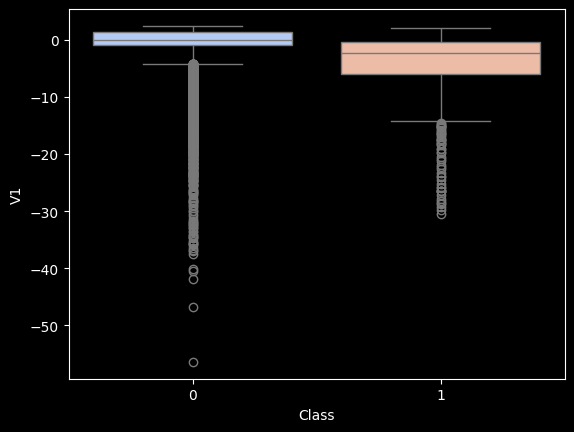

In [9]:
# ▶ Box plot 활용 클래스(Class) 별 데이터 비교
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

sns.boxplot(data=df, x='Class', y='V1', palette='coolwarm');

C:\Users\JunYeong.DESKTOP-IOMT4HU\AppData\Local\Temp\ipykernel_13660\3955667639.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=df, x='Class', y='V1', palette='Spectral')
C:\Users\JunYeong.DESKTOP-IOMT4HU\AppData\Local\Temp\ipykernel_13660\3955667639.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df, x='Class', y='V2', palette='Spectral')
C:\Users\JunYeong.DESKTOP-IOMT4HU\AppData\Local\Temp\ipykernel_13660\3955667639.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], data=df, x='Class'

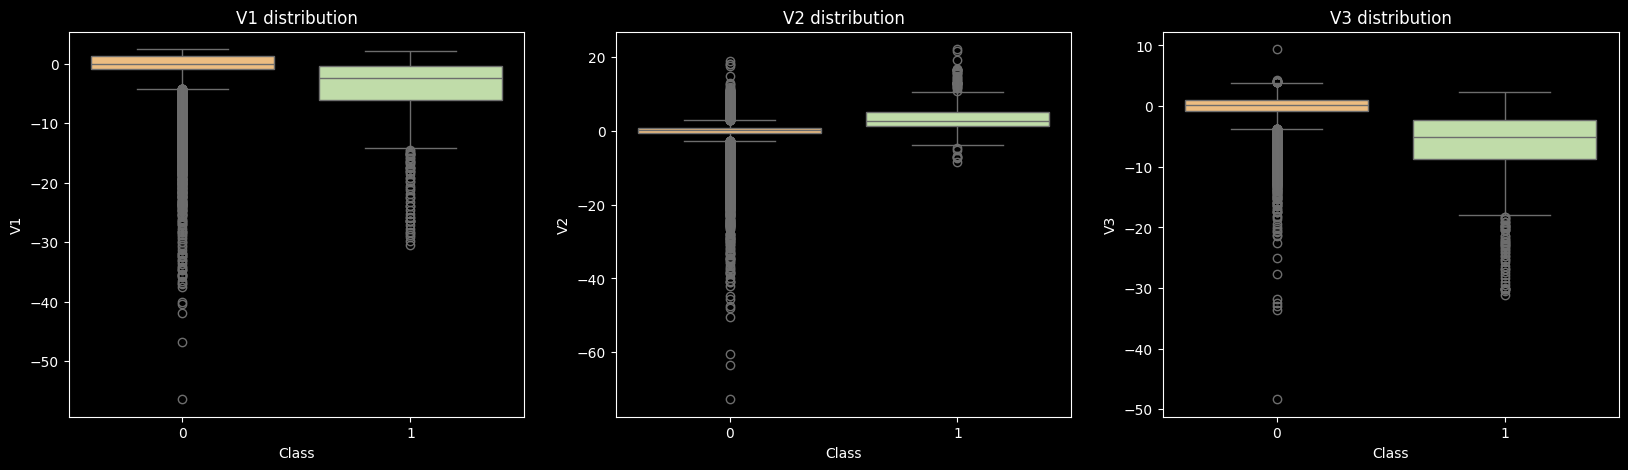

In [10]:
# ▶ Box plot 활용 클래스 별 데이터 비교
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

sns.boxplot(ax=axes[0], data=df, x='Class', y='V1', palette='Spectral')
axes[0].set_title("V1 distribution");

sns.boxplot(ax=axes[1], data=df, x='Class', y='V2', palette='Spectral')
axes[1].set_title("V2 distribution");

sns.boxplot(ax=axes[2], data=df, x='Class', y='V3', palette='Spectral')
axes[2].set_title("V3 distribution");

C:\Users\JunYeong.DESKTOP-IOMT4HU\AppData\Local\Temp\ipykernel_13660\1031502795.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df[df['Class']==1]['V1'], label='abnormal');
C:\Users\JunYeong.DESKTOP-IOMT4HU\AppData\Local\Temp\ipykernel_13660\1031502795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

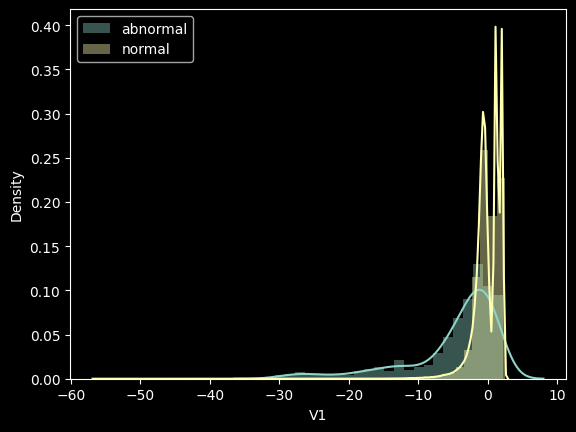

In [11]:
# ▶ histogram + KDE plot = distplot
sns.distplot( df[df['Class']==1]['V1'], label='abnormal');
sns.distplot( df[df['Class']==0]['V1'], label="normal");
plt.legend();

C:\Users\JunYeong.DESKTOP-IOMT4HU\AppData\Local\Temp\ipykernel_13660\3582027811.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class']==1]['V4'], label='abnormal', ax=axes[0]);
C:\Users\JunYeong.DESKTOP-IOMT4HU\AppData\Local\Temp\ipykernel_13660\3582027811.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

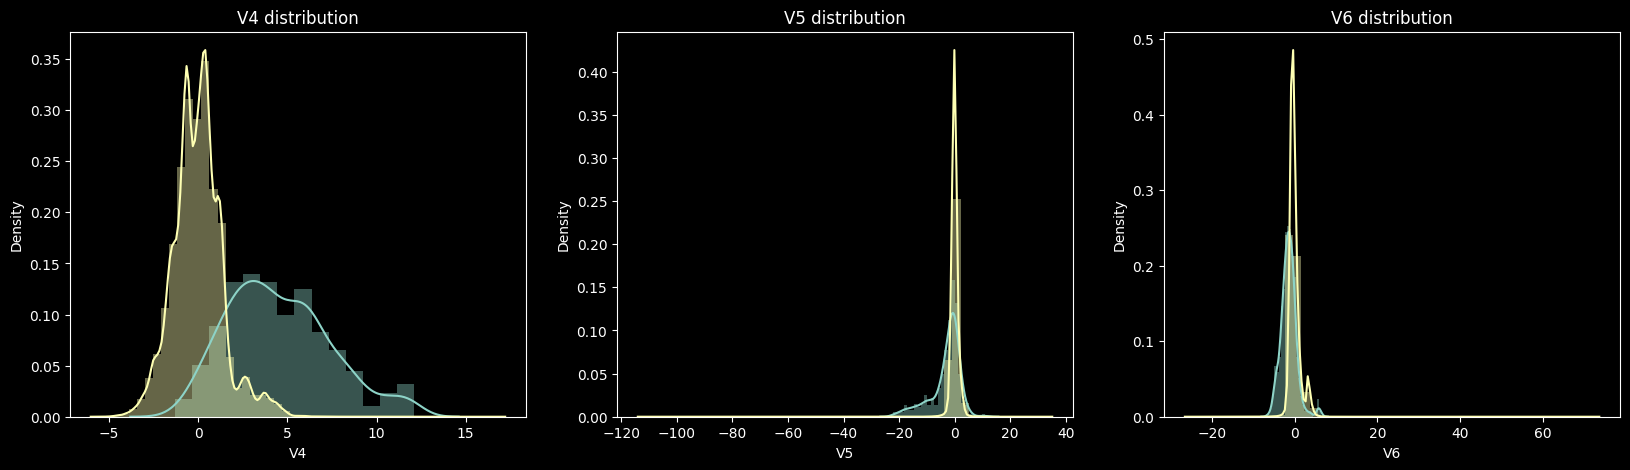

In [12]:
# ▶ dist plot 활용 클래스 별 데이터 분포 비교
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,5))


sns.distplot(df[df['Class']==1]['V4'], label='abnormal', ax=axes[0]);
sns.distplot(df[df['Class']==0]['V4'], label="normal", ax=axes[0]);
axes[0].set_title("V4 distribution");

sns.distplot(df[df['Class']==1]['V5'], label='abnormal', ax=axes[1]);
sns.distplot(df[df['Class']==0]['V5'], label="normal", ax=axes[1]);
axes[1].set_title("V5 distribution");

sns.distplot(df[df['Class']==1]['V6'], label='abnormal', ax=axes[2]);
sns.distplot(df[df['Class']==0]['V6'], label="normal", ax=axes[2]);
axes[2].set_title("V6 distribution");

In [13]:
v4_1 = pd.DataFrame(df[df['Class']==1]['V4'].describe())
v4_0 = pd.DataFrame(df[df['Class']==0]['V4'].describe())
v4_des = pd.concat([v4_1, v4_0], axis=1)
v4_des.columns = ['abnormal', 'normal']
v4_des

,abnormal,normal
count,492.000000,284315.000000
mean,4.542029,-0.007860
std,2.873318,1.399333
min,-1.313275,-5.683171
25%,2.373050,-0.850077
50%,4.177147,-0.022405
75%,6.348729,0.737624
max,12.114672,16.875344


## **🥈Session 2**  
**┗ 차원 축소**  
---

### · PCA vs T-sne vs TruncatedSVD
---
* 차원축소를 통해 우리가 보유하고 있는 데이터가 정상/비정상 패턴으로 분류가 가능한지 Viz.를 통해 확인

### · Random Down-Sampling
---
* Imbalanced Data이기 때문에 모든 데이터를 비교할 수 없음
* Class 0인 데이터를 Down-sampling을 통해서 Class 1 데이터와 비교

In [15]:
df = df.sample(frac=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7334,-0.103998,0.821841,2.111167,3.143894,0.533897,2.226544,-0.225142,0.349702,0.839618,0.466174,1.277975,-2.087050,2.009117,0.954694,0.422859,-1.794985,2.104505,-1.618620,-1.056195,-0.075167,0.227700,1.490276,0.222928,-0.637563,-1.675997,0.189156,0.070262,0.020607,3.80,0
36711,1.002012,-0.446890,-1.314272,0.374833,2.053055,3.655525,-0.259619,0.814050,0.156526,-0.081272,-0.540396,0.241700,-0.198704,0.222105,-0.134143,-0.083459,-0.506822,-0.048615,0.320370,0.236670,-0.101474,-0.552202,-0.245823,1.016818,0.843540,-0.341055,-0.000218,0.036009,143.66,0
279521,-0.136044,0.983674,-0.246844,-0.887660,0.946715,-0.476304,0.947656,-0.110265,0.201124,-0.108159,-1.768798,-0.107391,0.320127,-0.040651,-0.276444,0.127137,-0.749293,-0.528617,0.210083,0.117287,-0.354595,-0.753791,-0.052179,-1.069289,-0.310201,0.212973,0.361192,0.144953,2.69,0
74120,1.442386,-0.360197,-0.521603,-0.960726,-0.145148,-0.594544,-0.100262,-0.241526,-1.428449,0.837485,0.811667,0.051802,0.653884,0.170426,-0.268229,1.143099,-0.169899,-0.892362,1.229401,0.155886,0.200072,0.477975,-0.294883,-0.440780,0.884879,-0.053738,-0.032757,-0.013675,25.00,0
57786,1.373105,-0.869781,0.727890,-0.710181,-1.466819,-0.492747,-1.144380,0.073128,-0.067568,0.658549,-1.099076,-1.844293,-1.565062,-0.082523,1.368261,1.718308,-0.011497,-0.446868,0.417874,0.016944,0.337101,0.795621,-0.156539,-0.124455,0.420160,-0.013522,0.020679,0.019680,29.99,0


In [16]:
# ▶ shuffle 기능
df = df.sample(frac=1)

# ▶ amount of fraud classes 492 rows. (1:1 비율)
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# ▶ Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
216692,2.008953,-1.329969,-0.916528,-1.033591,-0.776995,0.116927,-1.005398,0.053175,-0.060055,0.865191,0.057615,-0.115672,0.246432,-0.309032,-0.394871,1.579242,-0.399348,-0.409174,0.994039,0.177122,0.369901,0.932813,-0.064840,-0.985519,-0.101920,-0.051906,-0.008290,-0.053146,99.99,0
46918,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,-7.781353,6.283377,-9.656606,-1.619135,-10.732109,0.288221,-7.898122,-13.570683,-4.590235,2.590173,-0.562264,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,648.00,1
95167,-0.492837,0.756069,1.183723,-0.473618,0.327508,-0.895601,0.736476,-0.134228,-0.069793,-0.110616,1.276478,-0.032459,-1.218659,-0.280919,-0.131029,0.833289,-0.597945,0.377375,-0.567529,-0.039789,-0.236756,-0.584096,0.018312,0.240250,-0.562001,-0.168168,-0.009371,-0.109824,11.98,0
154670,-2.296987,4.064043,-5.957706,4.680008,-2.080938,-1.463272,-4.490847,1.029246,-1.593249,-8.993811,7.864467,-10.649840,1.826591,-12.913632,-0.766330,-7.954098,-7.809635,-1.718511,3.832985,1.264954,1.089084,0.975398,-0.625530,-0.535181,0.247435,0.160400,0.969582,0.335041,104.00,1
124176,-0.356326,1.435305,-0.813564,1.993117,2.055878,-0.543579,0.487691,0.085449,-0.536352,-2.231209,0.273984,-0.535839,0.595677,-5.141823,0.732367,0.623913,4.090983,1.634084,0.260847,0.303262,-0.312863,-0.687874,-0.267003,-1.158480,0.271460,-0.155397,0.114328,0.101526,1.00,1


In [17]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [18]:
# ▶ Under(Down)-sampling한 데이터 표준화 진행
from sklearn.preprocessing import StandardScaler

X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_ = StandardScaler().fit_transform(X)
X_ = pd.DataFrame(X_)

In [19]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time

# ▶ T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# ▶ PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# ▶ TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values) # X 사용
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 3.1 s
PCA took 0.012 s
Truncated SVD took 0.006 s


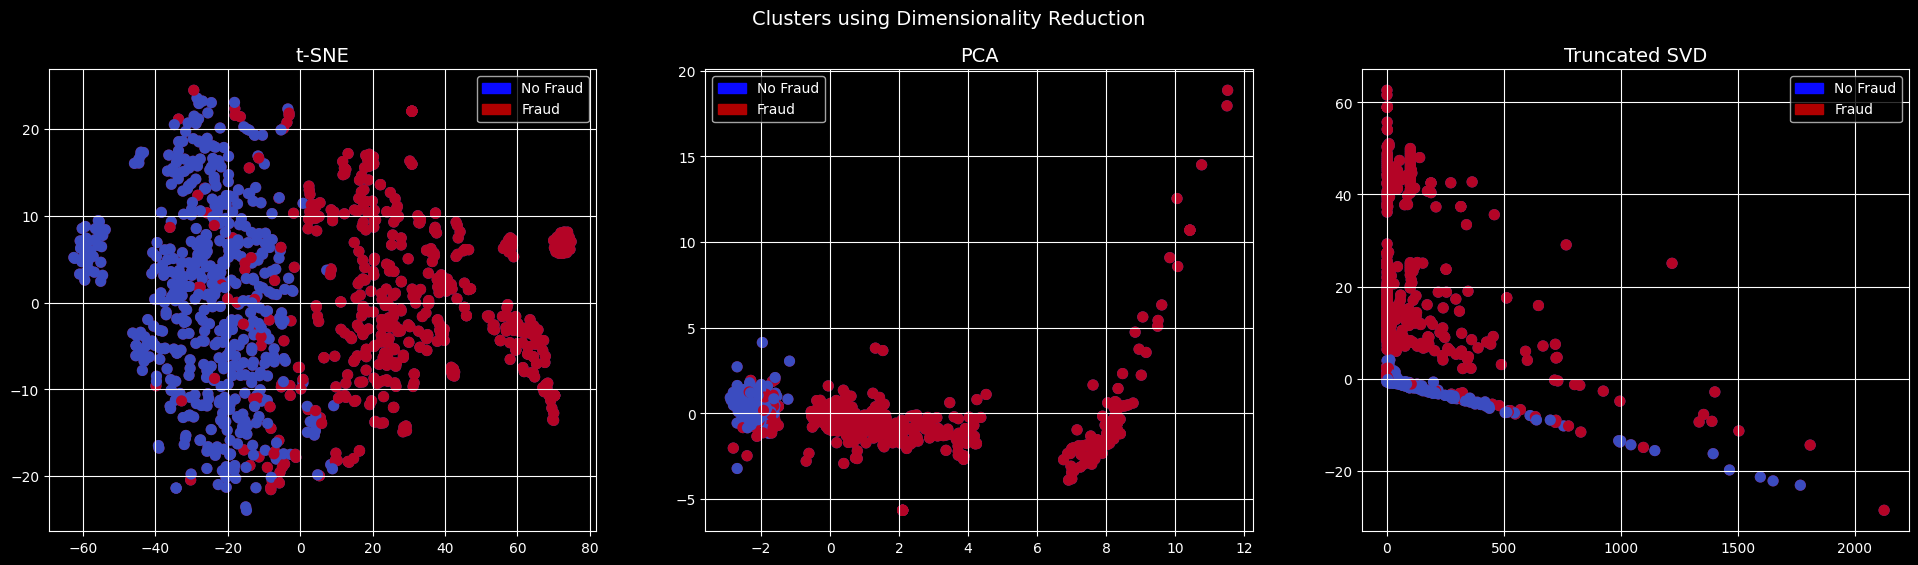

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
%matplotlib inline
plt.style.use(['dark_background'])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# ▶ t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# ▶ PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# ▶ TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

## **🥇Session 3**  
**┗ 이상 탐지 모델링**  
---

#### Box plot을 이용한 이상치 탐지 시도

In [32]:
from collections import Counter

def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of outliers is:', len(multiple_outliers))
    
    return multiple_outliers

In [33]:
# ▶ def. IQR_method 해석

from collections import Counter

outlier_list = []
n = 0

column='V1'

# 1st quartile (25%)
Q1 = np.percentile(df[column], 25)
# 3rd quartile (75%)
Q3 = np.percentile(df[column],75)

# Interquartile range (IQR)
IQR = Q3 - Q1

# outlier step
outlier_step = 1.5 * IQR

# Determining a list of indices of outliers
outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index

# appending the list of outliers 
outlier_list.extend(outlier_list_column)

# selecting observations containing more than x outliers
outlier_list = Counter(outlier_list)        
multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

In [34]:
# ▶ Outlier의 Index마다 검출 시 1을 부여함, 추후 n parameter를 통해 이상 점을 탐지
outlier_list

Counter({192969: 1,
         89777: 1,
         148251: 1,
         77935: 1,
         30897: 1,
         182963: 1,
         227490: 1,
         77397: 1,
         40437: 1,
         135119: 1,
         279960: 1,
         275761: 1,
         225290: 1,
         94579: 1,
         257538: 1,
         62164: 1,
         6305: 1,
         27986: 1,
         211994: 1,
         59950: 1,
         93381: 1,
         146961: 1,
         148184: 1,
         7574: 1,
         40867: 1,
         147427: 1,
         120097: 1,
         73031: 1,
         40207: 1,
         34789: 1,
         121658: 1,
         5296: 1,
         235455: 1,
         225834: 1,
         253806: 1,
         65481: 1,
         115149: 1,
         69349: 1,
         186745: 1,
         72889: 1,
         200706: 1,
         102120: 1,
         174556: 1,
         55145: 1,
         255905: 1,
         223526: 1,
         153823: 1,
         62019: 1,
         145376: 1,
         185470: 1,
         282443: 1,
     

In [35]:
# ▶ Feature list 정의
df_col = list(df.columns)
df_col.remove('Class')
print(df_col)
# ▶ Sacled data의 col명 재정의
X_.columns = df_col

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [36]:
# ▶ detecting outliers, parameter n
feature_list = df_col
Outliers_IQR = IQR_method(X_,5,feature_list)
print(Outliers_IQR[0:5])

Total number of outliers is: 130
[20, 27, 31, 48, 62]


### · 모델 평가
---

In [37]:
# ▶ Outlier data, dataframe 변환
df_outlier = pd.DataFrame(Outliers_IQR, columns=['index'])
df_outlier['Class_pred'] = 1
df_outlier.set_index('index', inplace = True)
df_outlier.index.name=''
df_outlier.head()

,Class_pred
,
20,1
27,1
31,1
48,1
62,1


In [38]:
# ▶ 원본 데이터에 Concat
df_merge = pd.concat([df, df_outlier], axis=1)

# ▶ Class_pred 빈 곳에 0 삽입
df_merge['Class_pred'] = df_merge['Class_pred'].fillna('0')

# ▶ Outlier data 확인
df_merge['Class_pred'].value_counts()

# ▶ Outlier data 확인
df_merge[df_merge['Class_pred'] == 1]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Class_pred
506,-1.254476,0.322250,1.784507,-0.307396,1.009086,-0.998491,0.328482,0.131284,-0.485255,-1.028343,-0.198156,-0.360171,-0.663443,-0.227584,0.871873,0.352768,0.114134,-0.543103,-1.038336,0.032603,-0.160980,-0.778999,-0.025359,0.000828,0.154781,0.042034,-0.019550,0.081176,1.79,0,1.0
627,-0.394364,0.962489,1.164111,-0.110028,0.221216,-0.526324,0.505040,0.147743,-0.499457,-0.311499,1.049041,0.055269,-0.754753,-0.081798,0.312034,0.712748,-0.312043,0.568456,0.328515,0.091281,-0.240069,-0.709400,-0.051337,-0.071240,-0.173978,0.077661,0.234553,0.083875,1.79,0,1.0
302,-1.045669,0.485510,1.569232,0.160929,0.862462,0.523043,0.765997,0.092998,-0.037045,-0.184663,1.062636,0.376407,-1.423234,0.075106,-1.040320,-0.708839,-0.034009,-0.759178,-0.961683,-0.377133,0.012875,0.359808,-0.075788,-0.317591,-0.073339,-0.532773,-0.241140,-0.124891,17.56,0,1.0
233,1.171954,0.311213,0.313605,0.519230,-0.058032,-0.258769,-0.043843,0.039599,-0.344227,-0.179727,1.979016,1.406746,0.871995,-0.212157,0.563276,0.348120,-0.021623,-0.343891,-0.271036,-0.054283,-0.200153,-0.541916,0.137491,-0.001739,0.139121,0.104376,-0.005414,0.018728,1.29,0,1.0
196,-0.485238,0.658497,1.949967,1.249695,0.426410,0.231513,0.585115,0.029163,-0.520297,0.055911,1.265311,0.521277,-0.830439,0.157455,-0.365075,-1.142187,0.409601,-0.204876,1.010483,0.089378,0.007290,0.328244,-0.232563,0.225572,0.025892,-0.247395,-0.025381,-0.118565,5.97,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,-0.456586,0.541708,1.331297,0.559447,0.184045,0.612792,0.632759,0.152253,-0.202196,-0.510698,-1.363929,-0.431828,-0.477289,0.005567,0.518554,-0.784473,0.425146,-0.490890,1.319237,0.194232,-0.134465,-0.316126,-0.072149,-0.749725,-0.039644,0.472098,0.075612,0.099985,74.22,0,1.0
179,-0.182928,-0.920683,1.818758,-2.450936,-1.247560,0.147436,0.218629,-0.407290,-2.023879,1.410940,1.672419,-0.103321,1.082281,-1.044099,-0.319322,-0.255878,-0.104802,0.221478,-1.240285,-0.242810,0.030806,0.848899,0.120259,0.219241,-0.441860,-0.386687,-0.291553,-0.448051,137.00,0,1.0
905,1.120872,0.142425,0.782354,1.517495,-0.451665,-0.179163,-0.099553,0.011572,0.422085,-0.177543,-0.268722,0.916821,0.287166,-0.185884,-0.281333,-0.817230,0.373960,-1.007960,-0.523609,-0.167307,-0.004126,0.292506,-0.059899,0.434357,0.636963,-0.263692,0.057531,0.023309,9.99,0,1.0
271,-0.351287,1.183754,0.530794,0.543891,0.798441,-0.804472,1.563170,-0.935794,0.633634,2.303627,1.398891,-0.318657,-1.410645,-0.155225,0.277950,-0.706228,-0.780092,0.354094,0.618678,0.596401,-0.121755,0.668124,-0.057380,0.301398,-0.730946,-0.538616,-0.037212,-0.479956,1.79,0,1.0


In [39]:
# ▶ 성능평가, 전혀 예측하지 못함
Y = df_merge["Class"].astype(int)
y_pred = df_merge['Class_pred'].astype(int)

from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.01      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



##### 다변량일 때는 Box plot 이상치탐지는 적합하지 않음

#### Isolation Forest

In [21]:
# ▶ IsolationForest 재학습
from sklearn.ensemble import IsolationForest

df5 = df.copy()

X = df5.drop(['Class'], axis=1)
y = df5['Class']

In [22]:
# ▶ IsolationForest 재학습
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(X)

IsolationForest(contamination=0.1, n_estimators=150)

In [23]:
# ▶ IsolationForest Score 및 Prediction

scores=model.decision_function(X)
anomaly=model.predict(X)

df5['scores']=scores
df5['anomaly']=anomaly

df5.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scores,anomaly
136900,0.986719,-0.994158,1.082336,0.776796,-1.482189,0.238521,-0.935274,0.235289,-0.177895,0.656996,-0.917250,-0.591567,-1.040570,-0.044535,0.840376,-1.415002,0.208170,1.129288,-1.552659,-0.405404,-0.298893,-0.568455,0.023471,-0.011086,0.103345,-0.375037,0.075899,0.058741,133.00,0,0.067464,1
104402,1.200792,-0.600493,0.407171,-0.599645,-1.062214,-0.851247,-0.282020,-0.204297,-1.357291,0.773789,1.612063,1.237210,1.296877,0.137512,0.031512,-1.155834,-0.261070,0.999119,-0.482956,-0.255896,-0.468759,-1.044677,0.126380,0.562546,0.013695,0.775296,-0.070313,0.017203,79.60,0,0.063830,1
176436,-0.711581,0.484197,0.920113,-0.917531,0.957369,-1.374303,0.947256,-0.183693,-0.277024,-0.907719,-1.069961,-0.129943,-0.475704,0.242717,-0.620737,0.074443,-0.526357,-0.717802,-0.476939,-0.114969,-0.197005,-0.699307,-0.056279,0.030838,-0.138131,0.106706,0.016259,0.125229,1.29,0,0.090248,1
148763,-0.453236,1.007383,0.262325,-0.411546,0.499375,-1.049440,0.883196,-0.289578,1.531711,-0.362281,0.082634,-2.418138,1.517828,1.465927,-1.040411,-0.193429,0.364411,-0.567668,-0.366953,-0.046929,-0.445107,-0.749508,0.254166,-0.090609,-0.452217,0.105044,0.226868,0.134448,9.99,0,0.064435,1
17313,1.350141,-1.132400,-0.077790,-1.472451,-1.143719,-0.712399,-0.561040,-0.193414,-2.356140,1.573088,1.019193,-0.278272,0.295106,0.126783,-0.290353,-0.259442,0.259216,0.058266,0.421075,-0.146721,-0.486118,-1.311337,0.084329,-0.057943,0.210499,-0.537772,-0.011683,0.020933,100.83,0,0.053653,1
181524,-2.642601,0.271188,2.129614,0.087498,-1.000481,3.468849,-1.334234,0.290215,1.056489,1.792497,-0.206046,0.846021,0.248676,-1.632015,-1.123352,-2.717134,0.949811,1.067187,-0.454494,-0.223887,0.262088,0.289592,-0.122137,-1.643512,0.664208,0.010584,1.163817,0.614257,100.00,0,-0.028327,-1
181335,-1.396523,0.287014,1.078797,-1.922129,-1.210332,-0.220403,-0.960733,0.924812,-1.367800,-0.453771,0.338280,0.770408,0.873114,0.522406,0.641555,-1.169784,0.121960,1.980839,1.028901,-0.405474,-0.366493,-0.959059,-0.128369,-0.333397,-0.057663,0.633834,-0.331027,-0.116562,15.80,0,0.042705,1
127578,-1.802160,-1.639632,1.031197,1.630680,-2.164741,0.898454,2.458265,-0.021194,-0.455801,-0.863934,-0.249715,-0.544717,-0.541837,0.288560,1.690591,-0.101475,-0.000406,0.447922,-0.545072,1.654105,0.859925,1.127562,1.720274,0.320717,-0.206127,-0.217514,-0.051876,0.236088,756.00,0,-0.011702,-1
270601,-0.730483,0.284228,-0.534646,-1.250202,0.308670,-1.553882,0.892276,-0.061059,-1.943106,-0.099042,-1.428686,-0.290996,0.091193,0.693727,-0.923585,-2.063630,0.285659,0.771953,-0.701001,-0.460650,-0.074004,0.037707,-0.164618,0.092072,0.103668,0.778272,-0.076816,0.016385,53.45,0,0.054655,1
270513,0.377610,-1.146633,-0.720451,-3.283302,1.424571,3.932621,-0.557729,0.700182,-1.819459,1.209474,-0.413454,-1.199547,0.262444,-0.586102,0.084082,-0.801437,0.275501,0.120192,-0.057806,-0.027982,0.022465,0.513709,0.350781,0.677010,-1.350918,-0.314763,0.139461,0.049672,96.60,0,0.021474,1


In [24]:
# ▶ 평가를 위해 다시 라벨링
y_pred = np.where(anomaly==-1, 1, 0)

In [25]:
# ▶ 성능평가
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    284315
           1       0.02      0.90      0.03       492

    accuracy                           0.90    284807
   macro avg       0.51      0.90      0.49    284807
weighted avg       1.00      0.90      0.95    284807



In [26]:
# ▶ 이상점을 너무 많이 에측함
pd.Series(y_pred).value_counts() 

0    256326
1     28481
Name: count, dtype: int64

### · Scoring 기반 Threshold 조정
---

In [27]:
# ▶ prediction과 Score 비교
# ▶ 음수 값일 수록 Outlier일 확률이 큼
y_pred[0:5], model.decision_function(X)[0:5]

(array([0, 0, 0, 0, 0]),
 array([0.06746392, 0.06382982, 0.09024839, 0.0644348 , 0.0536525 ]))

C:\Users\JunYeong.DESKTOP-IOMT4HU\AppData\Local\Temp\ipykernel_13660\1980579743.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df5['scores'], label='Train');


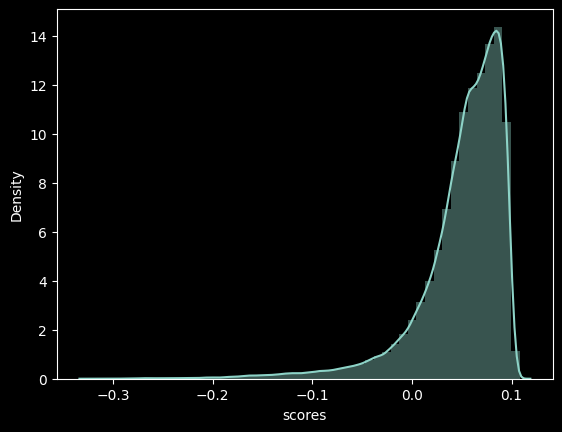

In [28]:
# ▶ Score 분포 확인
sns.distplot( df5['scores'], label='Train');

In [29]:
# ▶ Score 변수 할당
y_pred = np.where(df5['scores'] < -0.2, 1, 0)

In [30]:
# ▶ 성능평가
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.26      0.33      0.29       492

    accuracy                           1.00    284807
   macro avg       0.63      0.66      0.64    284807
weighted avg       1.00      1.00      1.00    284807



In [31]:
# ▶ 적당한 수준
pd.Series(y_pred).value_counts()

0    284185
1       622
Name: count, dtype: int64